In [3]:
import pandas as pd

# Asegúrate de que el archivo tenga la extensión .xlsx
df = pd.read_excel('Taller_MetroBogota.xlsx')

print(df)

    ID            Estación  Ciudad  AvanceObra (%)  Presupuesto (millones)
0    1            Calle 26  Bogotá              25                   12000
1    2  Avenida 1° de Mayo  Bogotá              40                   18000
2    3            Restrepo  Bogotá              60                   15000
3    4             Venecia  Bogota              35                   13000
4    5                Bosa  Bogota              50                   16000
5    6         Santa Lucía  BOGOTÁ              45                   14500
6    7            Calle 72  BOGOTA              55                   20000
7    8           Calle 100  Bogotá              70                   22000
8    9           Calle 116  Bogota              65                   21000
9   10           Calle 127  BOGOTÁ              20                   12500
10  11     Portal Américas  Bogotá              85                   25000
11  12       San Victorino  BOGOTÁ              30                   13500
12  13     Kennedy Centra

In [5]:
# Parte 1 : Limpieza de texto


#1.	Convierte todo el texto de la columna "Ciudad" a mayúsculas usando .str.upper().

df['Ciudad'] = df['Ciudad'].str.upper()

print(df['Ciudad'])

0     BOGOTÁ
1     BOGOTÁ
2     BOGOTÁ
3     BOGOTA
4     BOGOTA
5     BOGOTÁ
6     BOGOTA
7     BOGOTÁ
8     BOGOTA
9     BOGOTÁ
10    BOGOTÁ
11    BOGOTÁ
12    BOGOTA
13    BOGOTÁ
14    BOGOTÁ
15    BOGOTA
16    BOGOTA
17    BOGOTA
18    BOGOTÁ
19    BOGOTA
Name: Ciudad, dtype: object


In [7]:
#2.	Reemplaza todas las variantes para que se unifiquen como "BOGOTÁ".

df['Ciudad'] = df['Ciudad'].str.upper().str.replace('BOGOTA', 'BOGOTÁ')

print(df['Ciudad'])

0     BOGOTÁ
1     BOGOTÁ
2     BOGOTÁ
3     BOGOTÁ
4     BOGOTÁ
5     BOGOTÁ
6     BOGOTÁ
7     BOGOTÁ
8     BOGOTÁ
9     BOGOTÁ
10    BOGOTÁ
11    BOGOTÁ
12    BOGOTÁ
13    BOGOTÁ
14    BOGOTÁ
15    BOGOTÁ
16    BOGOTÁ
17    BOGOTÁ
18    BOGOTÁ
19    BOGOTÁ
Name: Ciudad, dtype: object


In [11]:
#Parte 2: Análisis de cuartiles sobre AvanceObra (%)

#1.	Calcula los cuartiles para la columna "AvanceObra (%)".

cuartiles = df['AvanceObra (%)'].quantile([0.25, 0.5, 0.75])
print(f"Cuartiles de AvanceObra (%): {cuartiles}")

Cuartiles de AvanceObra (%): 0.25    35.00
0.50    52.50
0.75    66.25
Name: AvanceObra (%), dtype: float64


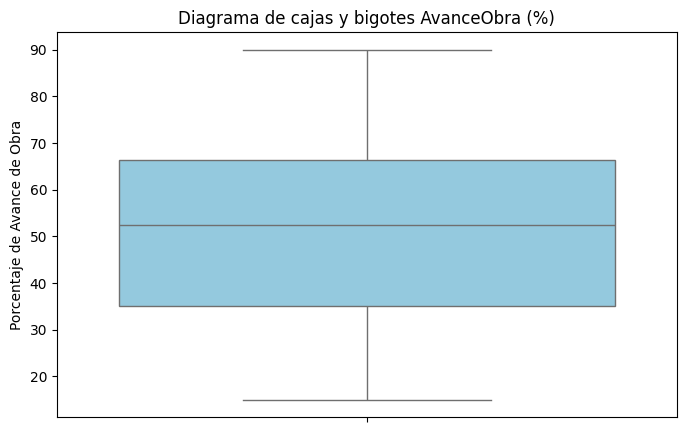

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer archivo Excel
df = pd.read_excel('Taller_MetroBogota.xlsx')

# Crear el boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['AvanceObra (%)'], color='skyblue')

# Personalizar la gráfica
plt.title('Diagrama de cajas y bigotes AvanceObra (%)')
plt.ylabel('Porcentaje de Avance de Obra')

# Mostrar la gráfica
plt.show()


In [ ]:
#2.	Interpreta en qué rango están el 25%, 50% y 75% de las estaciones.

#El 25% de las estaciones tienen un avance de hasta el 35%

#El 50% de las estaciones tienen un avance de hasta el 52.5%.

#El 75% de las estaciones tienen un avance de hasta el 66.25%.



In [14]:
# 3.	Calcula el IQR y los límites inferior/superior.

IQR = cuartiles[0.75] - cuartiles[0.25]

print(f"Rango Intercuartílico (IQR): {IQR}")

Rango Intercuartílico (IQR): 31.25


In [16]:
#Parte 3: Detección de outliers en Presupuesto (millones)

#1.	Usa el IQR de la columna "Presupuesto (millones)" para detectar outliers.

limite_inferior = cuartiles[0.25] - 1.5 * IQR   
limite_superior = cuartiles[0.75] + 1.5 * IQR

outliers = df[(df['Presupuesto (millones)'] < limite_inferior) | (df['Presupuesto (millones)'] > limite_superior)]
print(f"Outliers detectados:\n{outliers[['Estación', 'Presupuesto (millones)']]}")

Outliers detectados:
              Estación  Presupuesto (millones)
0             Calle 26                   12000
1   Avenida 1° de Mayo                   18000
2             Restrepo                   15000
3              Venecia                   13000
4                 Bosa                   16000
5          Santa Lucía                   14500
6             Calle 72                   20000
7            Calle 100                   22000
8            Calle 116                   21000
9            Calle 127                   12500
10     Portal Américas                   25000
11       San Victorino                   13500
12     Kennedy Central                   11000
13      Antonio Nariño                   15500
14            Calle 45                   24000
15          Las Nieves                   13000
16      Museo Nacional                   26000
17            Ricaurte                   14000
18               Tunal                   27000
19        San Bernardo                 

In [17]:
# 2.	Filtra las estaciones que superan o están por debajo de los límites.

estaciones_fuera_limites = df[(df['Presupuesto (millones)'] < limite_inferior) | (df['Presupuesto (millones)'] > limite_superior)]
print(f"Estaciones fuera de los límites:\n{estaciones_fuera_limites[['Estación', 'Presupuesto (millones)']]}")

Estaciones fuera de los límites:
              Estación  Presupuesto (millones)
0             Calle 26                   12000
1   Avenida 1° de Mayo                   18000
2             Restrepo                   15000
3              Venecia                   13000
4                 Bosa                   16000
5          Santa Lucía                   14500
6             Calle 72                   20000
7            Calle 100                   22000
8            Calle 116                   21000
9            Calle 127                   12500
10     Portal Américas                   25000
11       San Victorino                   13500
12     Kennedy Central                   11000
13      Antonio Nariño                   15500
14            Calle 45                   24000
15          Las Nieves                   13000
16      Museo Nacional                   26000
17            Ricaurte                   14000
18               Tunal                   27000
19        San Bernardo     

In [19]:
#  Parte 4: Agrupación

#1.	Agrupa por "Ciudad" y calcula:
#o	Promedio de "AvanceObra (%)"
#o	Suma total de "Presupuesto (millones)"


agrupado = df.groupby("Ciudad").agg({
    "AvanceObra (%)": "mean",
    "Presupuesto (millones)": "sum"
}).reset_index()
print("Datos agrupados por Ciudad:")
print(agrupado)

Datos agrupados por Ciudad:
   Ciudad  AvanceObra (%)  Presupuesto (millones)
0  BOGOTA       48.000000                   89000
1  BOGOTÁ       52.000000                   91500
2  Bogota       48.750000                   64000
3  Bogotá       56.666667                  107500


C:\Users\diego\AppData\Local\Temp\ipykernel_17676\2798925394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ciudad', y='AvanceObra (%)', data=df, palette='Set2')


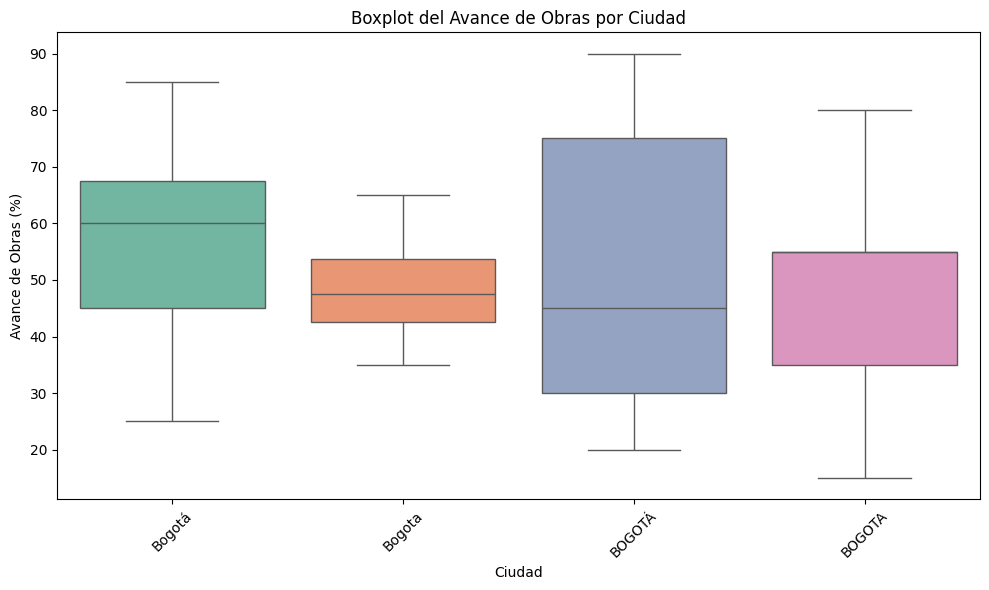

C:\Users\diego\AppData\Local\Temp\ipykernel_17676\2798925394.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ciudad', y='Presupuesto (millones)', data=agrupado, palette='Set1')


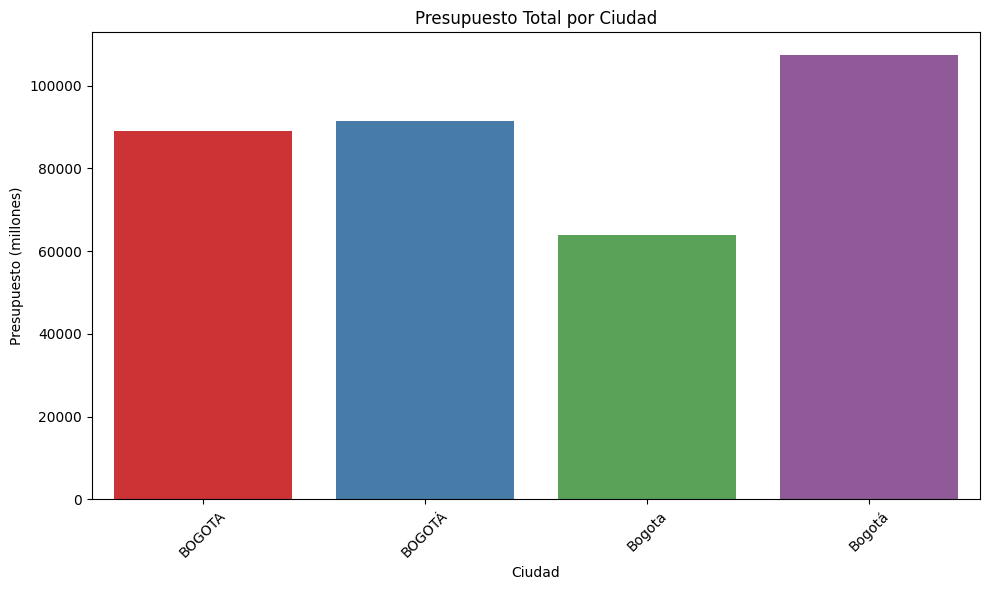

In [20]:
# Opcional (extra): Visualización
# •	Haz un boxplot del avance de obras.
# •	Crea un gráfico de barras por ciudad del presupuesto total.+

# Boxplot del avance de obras
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Ciudad', y='AvanceObra (%)', data=df, palette='Set2')
plt.title('Boxplot del Avance de Obras por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Avance de Obras (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras del presupuesto total por ciudad    
plt.figure(figsize=(10, 6))
sns.barplot(x='Ciudad', y='Presupuesto (millones)', data=agrupado, palette='Set1')

plt.title('Presupuesto Total por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Presupuesto (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
